# EM算法
选取IRIS数据中的一维，复现中第14章的图1-图14

In [1]:
import matplotlib.pyplot as plt
p = plt.rcParams
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5
colors = ['lightblue', 'orange', 'green']


import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy.stats import norm


# 鸢尾花数据
iris = datasets.load_iris(); X = iris.data[:, :1]
K = 3

### 图1 样本分布

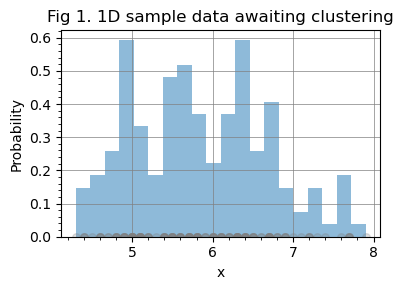

In [2]:
# Calculate number of bins for the histogram
num_bins = 20
y_scatter = np.zeros_like(X)

# Create histogram
fig, ax = plt.subplots(figsize=(4, 3))
n, bins, patches = ax.hist(X, num_bins, density=True, alpha=0.5)

ax.scatter(X, y_scatter, alpha=0.25, color='gray', s=30) # s is the size of the points

ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.title('Fig 1. 1D sample data awaiting clustering')
fig.tight_layout()

plt.show()


### 图2-4 E步：最大化期望
似然概率密度函数 $f_{XY}(x | C_1, \theta^0) = \frac{1}{\sigma_1 \sqrt{2\pi}} \exp\left(-\frac{1}{2} \left(\frac{x - \mu_1}{\sigma_1}\right)^2\right)$
证据因子（概率密度函数）
后验概率

In [3]:
def likelihood_probability(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


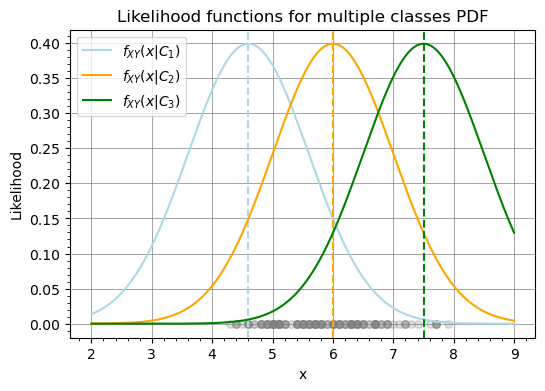

In [4]:
theta = [0.33, 0.33, 0.34, 4.4, 5.2, 6.4, 1, 1, 1]

init_params = [
    (0.33, 4.6, 1),  # Class 1
    (0.33, 6, 1),  # Class 2
    (0.34, 7.5, 1)     # Class 3
]

# def plot_
def plot_likelihood(class_params):
    plt.figure(figsize=(6, 4))
    
    # Initialize a variable for the combined PDF
    x = np.linspace(2, 9, 1000)
    combined_pdf = np.zeros_like(x)
       
    # Generate and plot PDFs for each class
    for i, (_, mu, sigma) in enumerate(class_params):
        pdf = norm.pdf(x, mu, sigma)
        plt.plot(x, pdf, label=f'$f_{{XY}}(x|C_{i+1})$', color=colors[i % len(colors)])
        plt.axvline(x=mu, color=colors[i % len(colors)], linestyle='--')
    
    
    plt.xlabel('x')
    plt.ylabel('Likelihood')
    plt.title('Likelihood functions for multiple classes PDF')
    plt.scatter(X, y_scatter, alpha=0.25, color='gray', s=30)
    plt.legend()
    plt.show()

plot_likelihood(init_params)

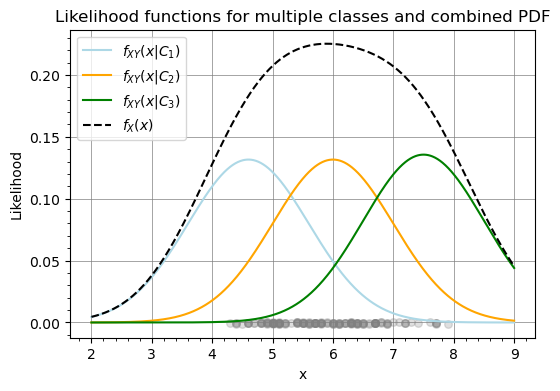

In [5]:
def plot_pdf(class_params):
    plt.figure(figsize=(6, 4))
    
    # Initialize a variable for the combined PDF
    x = np.linspace(2, 9, 1000)
    combined_pdf = np.zeros_like(x)
       
    # Generate and plot PDFs for each class
    for i, (c, mu, sigma) in enumerate(class_params):
        pdf = c * norm.pdf(x, mu, sigma)
        combined_pdf += pdf
        plt.plot(x, pdf, label=f'$f_{{XY}}(x|C_{i+1})$', color=colors[i % len(colors)])
    
    # Plot the combined PDF
    plt.plot(x, combined_pdf, label='$f_X(x)$', color='black', linestyle='--')
    
    plt.xlabel('x')
    plt.ylabel('Likelihood')
    plt.title('Likelihood functions for multiple classes and combined PDF')
    y_scatter = np.random.uniform(-0.001, 0.00015, size=X.shape)
    plt.scatter(X, y_scatter, alpha=0.25, color='gray', s=30)
    plt.legend()
    plt.show()


plot_pdf(init_params)

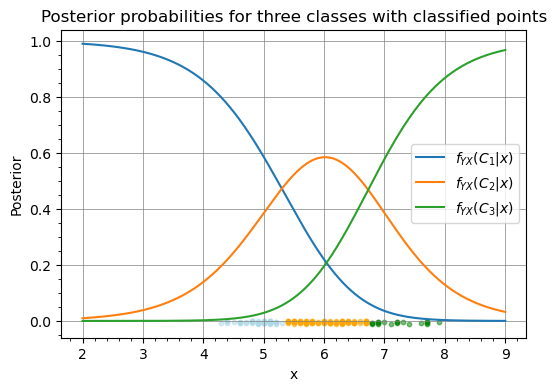

In [6]:
def classify_points_based_on_posterior(class_params, x_values):
    total_px = np.zeros_like(x_values)
    posteriors = []

    # Calculate P(x) and the likelihoods P(x|C)
    for c, mu, sigma in class_params:
        px_c = c * norm.pdf(x_values, mu, sigma)
        total_px += px_c
        posteriors.append(px_c)

    # Calculate the posterior for each class
    posteriors = np.array([posteriors[i] / total_px for i in range(len(class_params))])

    # Classify each point based on the highest posterior probability
    classifications = np.argmax(posteriors, axis=0)
    return classifications


def plot_posterior_probabilities(class_params, x_values):
    plt.figure(figsize=(6, 4))
    
    x = np.linspace(2, 9, 1000)
    
    # Initialize variables for the total probability P(x) and the posteriors
    total_px = np.zeros_like(x)
    posteriors = []
    
    # Calculate P(x) and the likelihoods P(x|C)
    for c, mu, sigma in class_params:
        px_c = c * norm.pdf(x, mu, sigma)
        total_px += px_c
        posteriors.append(px_c)
    
    # Calculate the posterior for each class and plot
    for i, (c, mu, sigma) in enumerate(class_params):
        posterior = posteriors[i] / total_px
        plt.plot(x, posterior, label=f'$f_{{YX}}(C_{i+1}|x)$')
    
    # Classify points
    classifications = classify_points_based_on_posterior(class_params, X)
    # Overlay the scatter plot with classified results
    y_scatter = np.random.uniform(-0.01, 0.0015, size=X.shape)
    for i, color in enumerate(colors):
        plt.scatter(X[classifications == i], y_scatter[classifications == i], color=color, s=10, alpha=0.5)

    plt.xlabel('x')
    plt.ylabel('Posterior')
    plt.title('Posterior probabilities for three classes with classified points')
    plt.legend()
    plt.show()

plot_posterior_probabilities(init_params, X)

### EM算法迭代过程

In [7]:
weights_init = [0.33, 0.33, 0.34]
means_init = [[4.6], [5.2], [7.0]]
precisions_init = np.array([[[1.0]], [[1.0]], [[1.0]]])

gmm = GaussianMixture(n_components=K,
                      covariance_type='full',
                      tol=1e-6,
                      weights_init=weights_init,
                      means_init=means_init,
                      precisions_init=precisions_init,
                      max_iter=50)

gmm.fit(X);
gmm.n_iter_

d:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\miniconda\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


50

In [8]:
init_params = [
    (0.33, 4.6, 1),  # Class 1
    (0.33, 6, 1),  # Class 2
    (0.34, 7.5, 1)     # Class 3
]

def plot_by_iter(iteration_index):
    # Extract the parameters for that iteration
    weights_at_iter = gmm.iter['weight'][iteration_index]
    means_at_iter = gmm.iter['mean'][iteration_index]
    variances_at_iter = gmm.iter['var'][iteration_index]  # var should be the variance, not the precision
    std_devs_at_iter = np.sqrt(variances_at_iter)

    params = [(weights_at_iter[i], means_at_iter[i][0], std_devs_at_iter[i][0]) for i in range(K)]

    plot_likelihood(params)
    plot_pdf(params)
    plot_posterior_probabilities(params, X)

#### 第10次迭代

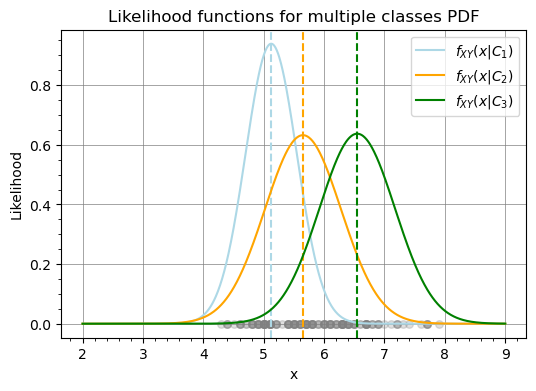

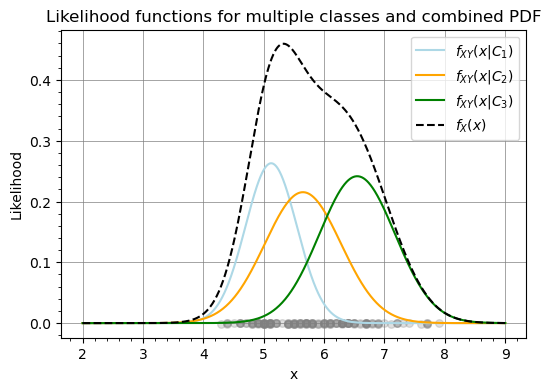

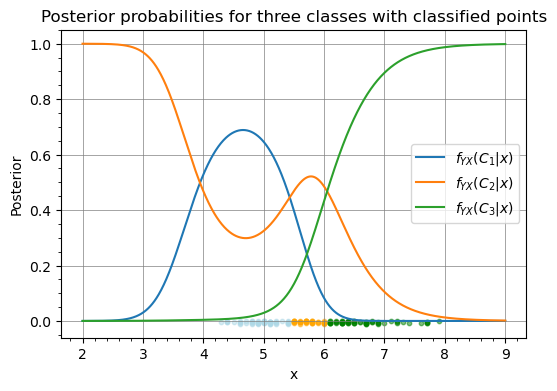

In [9]:
plot_by_iter(10)

#### 第30次迭代

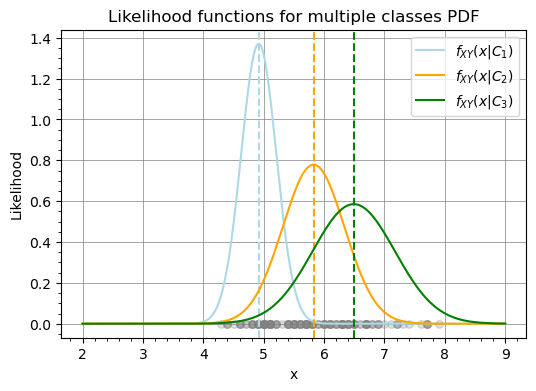

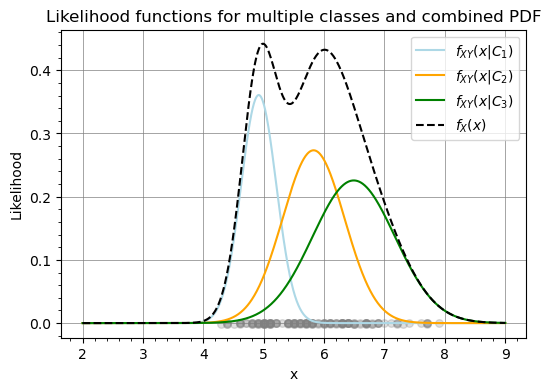

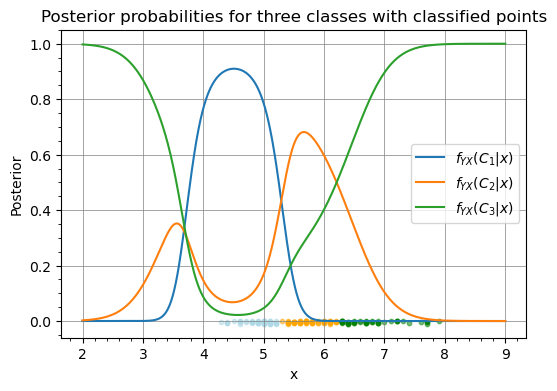

In [10]:
plot_by_iter(30)

#### 展示迭代收敛过程

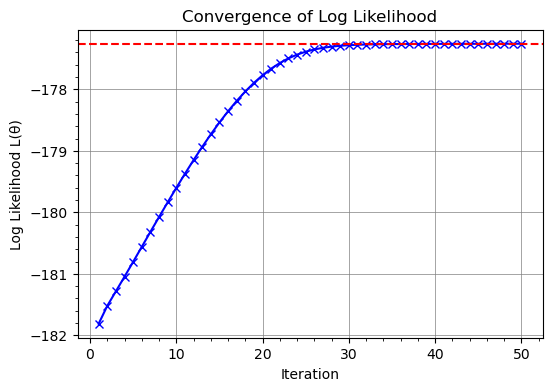

In [11]:
from scipy.stats import multivariate_normal

def calculate_log_likelihood(X, weights, means, vars):
    """Calculate the log likelihood of the data given a set of GMM parameters."""
    log_likelihood = 0.0
    for x in X:
        # Calculate the likelihood of x for each component
        component_likelihoods = [
            weights[k] * multivariate_normal.pdf(x, mean=means[k], cov=vars[k])
            for k in range(len(weights))
        ]
        # Sum the component likelihoods and take the logarithm
        log_likelihood += np.log(sum(component_likelihoods))
    return log_likelihood


log_likelihoods = []

for i in range(gmm.n_iter_):
    weights = gmm.iter['weight'][i]
    means = gmm.iter['mean'][i]
    vars = gmm.iter['var'][i]
    log_likelihoods.append(calculate_log_likelihood(X, weights, means, vars))


iterations = range(1, len(log_likelihoods) + 1)
plt.figure(figsize=(6, 4))
plt.plot(iterations, log_likelihoods, marker='x', color='blue')

plt.xlabel('Iteration')
plt.ylabel('Log Likelihood L(θ)')
plt.title('Convergence of Log Likelihood')
plt.axhline(y=log_likelihoods[-1], color='red', linestyle='--')
plt.show()


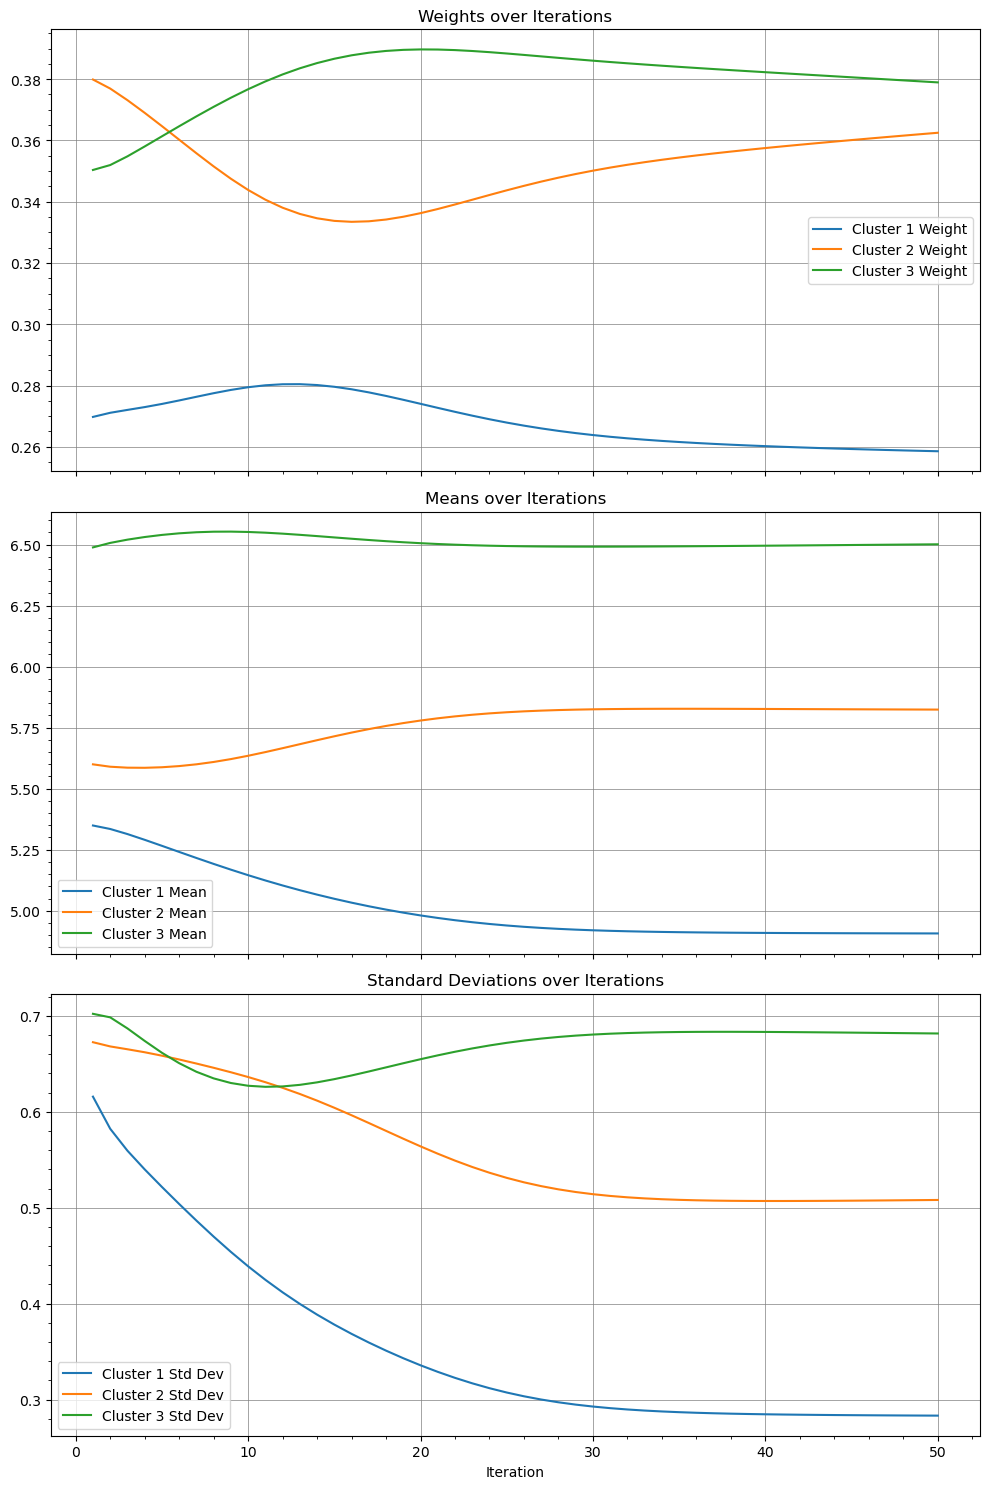

In [12]:
iterations = range(1, len(gmm.iter['weight']) + 1)
weights = (np.array(gmm.iter['weight'])).squeeze()
means = (np.array(gmm.iter['mean'])).squeeze()
std_devs = (np.sqrt(np.array(gmm.iter['var']))).squeeze()  # Convert variances to standard deviations

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plotting weights
for i in range(K):
    axes[0].plot(iterations, weights[:, i], label=f'Cluster {i+1} Weight')
axes[0].set_title('Weights over Iterations')
axes[0].legend()

# Plotting means
for i in range(K):
    axes[1].plot(iterations, means[:, i], label=f'Cluster {i+1} Mean')
axes[1].set_title('Means over Iterations')
axes[1].legend()

# Plotting standard deviations
for i in range(K):
    axes[2].plot(iterations, std_devs[:, i], label=f'Cluster {i+1} Std Dev')
axes[2].set_title('Standard Deviations over Iterations')
axes[2].set_xlabel('Iteration')
axes[2].legend()

plt.tight_layout()
plt.show()
